In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv')
print(df.shape)
df.head()

#dataset = pd.read_csv('flipkart_com-ecommerce_sample.tsv', delimiter = ‘\t’)

(20000, 15)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


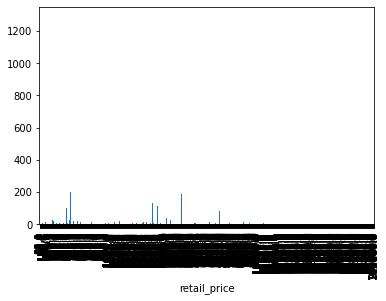

0.6541


In [14]:
df.groupby('retail_price').product_name.count().plot.bar(ylim=0)
plt.show()
print(13082/20000) #Baseline accuracy



In [22]:
y=df.description
x=df.drop('description',axis=1)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,product_rating,overall_rating,brand,product_specifications
9865,378adef67678b3c161b0cdca3e0e8b19,2016-01-07 00:54:41 +0000,http://www.flipkart.com/fieesta-plaza-analog-3...,Fieesta Plaza Analog 32 cm Dia Wall Clock,"[""Home Decor & Festive Needs >> Wall Decor & C...",WCKEDVH6ZYWJ2QCH,1899.0,949.0,"[""http://img6a.flixcart.com/image/wall-clock/q...",False,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Sales Pack..."
1707,ca381467453f54796b22c8225e0234d5,2016-01-01 10:55:30 +0000,http://www.flipkart.com/cloth-fusion-plain-sin...,Cloth Fusion Plain Single Blanket Camel,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEDJNKEWUHHBF5,2999.0,799.0,"[""http://img6a.flixcart.com/image/blanket/b/f/...",False,No rating available,No rating available,Cloth Fusion,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
18507,634c89325a6c7752985a74a67f985c1f,2016-05-26 12:20:35 +0000,http://www.flipkart.com/sparklings-cotton-chec...,Sparklings Cotton Checkered Double Bedsheet,"[""Baby Care >> Baby Bedding >> Baby Bedsheets ...",BDSEGZCETASFKSBF,1199.0,549.0,"[""http://img5a.flixcart.com/image/bedsheet/s/b...",False,No rating available,No rating available,Sparklings,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
16727,5fc603fe7ebf3dc16939096990cb75de,2015-12-06 03:01:47 +0000,http://www.flipkart.com/kraasa-men-s-solid-for...,Kraasa Men's Solid Formal Shirt,"[""Clothing >> Men's Clothing >> Shirts >> Form...",SHTE6RHTHFGZE6VV,1000.0,449.0,"[""http://img5a.flixcart.com/image/shirt/t/6/h/...",False,4.8,4.8,Regular,"{""product_specification""=>[{""key""=>""Pattern"", ..."
17553,35963d7f9af687639e2c3e187e72e0e2,2015-12-20 08:26:17 +0000,http://www.flipkart.com/voylla-artifictial-glo...,Voylla Artifictial Glossy Alloy Jewel Set,"[""Jewellery >> Jewellery Sets""]",JWSE5EF4HD9VFSYZ,2179.0,434.0,"[""http://img5a.flixcart.com/image/jewellery-se...",False,No rating available,No rating available,Voylla,"{""product_specification""=>[{""key""=>""Pearl Colo..."


In [28]:
y_test

19146    Key Features of Histeria Hand-held Bag Ideal F...
13477    JacknJewel Felicity Diamond Stone Gold 18K Yel...
17986    Buy Hoko Flip Cover for Apple iPad 2 only for ...
8229     Easy Gardening Home Plant Container Set (Pack ...
7989     Key Features of Vero Moda Regular Fit Women's ...
                               ...                        
12771    DailyObjects Back Cover for Apple iPad Mini/Re...
17916    Flipkart.com: Buy JanSport Big Student 34 L Ba...
15942    Buy JJC LH-W65B  Lens Hood only for Rs. 2400 f...
2396     Lovinoform Latest Comfortable Stylist Non Padd...
10887    Clairefontaine Dazzle Cover - 21.3 x 14.7 cm A...
Name: description, Length: 4000, dtype: object

In [27]:
y_train

9865     Fieesta Plaza Analog 32 cm Dia Wall Clock (Mar...
1707     Buy Cloth Fusion Plain Single Blanket Camel at...
18507    Key Features of Sparklings Cotton Checkered Do...
16727    Kraasa Men's Solid Formal Shirt\n             ...
17553    Voylla Artifictial Glossy Alloy Jewel Set (Gol...
                               ...                        
15288    Pearl Paradise "Ink drop" Swarovski Crystal Si...
7676     Key Features of Accessoreez Headlight LED Bulb...
8547     Times SD_183 Casual Analog Watch  - For Women\...
18545    Key Features of My Design Lac 8K Yellow Gold B...
834      Alibi Casual Short Sleeve Solid Women's Top\n ...
Name: description, Length: 16000, dtype: object

In [24]:
x_train.shape

(16000, 14)

In [25]:
x_test.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,product_rating,overall_rating,brand,product_specifications
19146,ae75ad2a6b3f8ea128b42b404cc06793,2016-03-02 19:09:22 +0000,http://www.flipkart.com/histeria-hand-held-bag...,Histeria Hand-held Bag,"[""Bags, Wallets & Belts >> Bags >> Hand Bags >...",HMBEGCVEZUBUWPTW,999.0,799.0,"[""http://img6a.flixcart.com/image/hand-messeng...",False,No rating available,No rating available,Histeria,"{""product_specification""=>[{""key""=>""Closure"", ..."
13477,be47cb9fc1bc48477a28c465a3afc8d5,2016-01-01 19:37:22 +0000,http://www.flipkart.com/jacknjewel-felicity-di...,JacknJewel Felicity Diamond Stone Gold 18K Yel...,"[""Jewellery >> Rings""]",RNGEYQZER4QQU4YK,37440.0,26000.0,"[""http://img5a.flixcart.com/image/ring/t/n/3/j...",False,No rating available,No rating available,JacknJewel,"{""product_specification""=>[{""key""=>""Collection..."
17986,6d5bc99b839a01c6f3def945d2ff7f3d,2016-01-01 13:15:34 +0000,http://www.flipkart.com/hoko-flip-cover-apple-...,Hoko Flip Cover for Apple iPad 2,"[""Mobiles & Accessories >> Tablet Accessories ...",ACCE6KYGDPYYMYNK,2500.0,1100.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,No rating available,No rating available,Hoko,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
8229,7621373ee34f011d6c28e5924ee1e89b,2016-01-07 05:50:25 +0000,http://www.flipkart.com/easy-gardening-home-pl...,Easy Gardening Home Plant Container Set,"[""Tools & Hardware >> Tools >> Gardening Tools...",PCSE6X3YEKWRUXKM,3000.0,2250.0,"[""http://img6a.flixcart.com/image/plant-contai...",False,No rating available,No rating available,Easy Gardening,"{""product_specification""=>[{""key""=>""Shape"", ""v..."
7989,ba6f0e8af49d70b1561d0aeb089909f8,2016-03-11 11:26:55 +0000,http://www.flipkart.com/vero-moda-regular-fit-...,Vero Moda Regular Fit Women's Trousers,"[""Clothing >> Women's Clothing >> Western Wear...",TROEGNQFB7DJ6JEN,3495.0,3495.0,"[""http://img6a.flixcart.com/image/trouser/w/g/...",False,No rating available,No rating available,Vero Moda,"{""product_specification""=>[{""key""=>""Pattern"", ..."


In [26]:
x_test.shape  #With the outputs of the shape() functions, 
#we can see that we have 4000 rows in the test data and 16000 in the training data.

(4000, 14)

In [93]:
x_test

[array([0.6588628 , 0.43305174, 0.31177982, 0.45836698, 0.87989707,
        0.81677988, 0.08988769, 0.14266124, 0.42471997, 0.80836454,
        0.34444862, 0.2886458 , 0.35766953, 0.74206135, 0.96052365,
        0.14390874, 0.52060496, 0.98775994, 0.3004404 , 0.11717394,
        0.3812513 , 0.10039989, 0.59310297, 0.40864754, 0.85297768,
        0.31391358, 0.36085105, 0.74685681, 0.24729281, 0.1826429 ,
        0.05078851, 0.47064092, 0.96585143, 0.70366023, 0.77370802,
        0.70237202, 0.74202865, 0.66430138, 0.05230548, 0.19740757,
        0.07808009, 0.80767075, 0.22468114, 0.12166303, 0.51007277,
        0.28423556, 0.39498074, 0.49910201, 0.5928847 , 0.98764837,
        0.18489173, 0.48319007, 0.65861357, 0.97383013, 0.01083575,
        0.88145725, 0.79575864, 0.74190817, 0.6119023 , 0.81989418,
        0.63364191, 0.93528923, 0.25975433, 0.36965967, 0.90244103,
        0.34118843, 0.28334591, 0.60645287, 0.62944161, 0.7885786 ,
        0.94361093, 0.84105018, 0.07263112, 0.47

In [114]:
def clean_text(X_train):
  """ function to clean data , input should a list of data like list of training data or test data and it will return cleaned data"""
  ret =[]
  for x_pre in X_train:
    x_pre = re.sub(r'https\S+','', x_pre)

    x_pre = re.sub('[^a-zA-Z]','', x_pre)
    x_pre = str(x_pre).lower()
    x_pre = word_tokenize(x_pre)
    x_pre = [item for item in x_pre if item not in stop_words]
    x_pre = ' '.join(x_pre)
    ret.append(x_pre)
  return ret 

In [115]:
X_train=clean_text(x_train)
X_test =clean_text(x_test)
print(X_test)

['uniqid', 'crawltimestamp', 'producturl', 'productname', 'productcategorytree', 'pid', 'retailprice', 'discountedprice', 'image', 'isfkadvantageproduct', 'productrating', 'overallrating', 'brand', 'productspecifications']


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#test size id 20% while train set size id 80%

In [47]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [50]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [111]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
stop_words = set(stopwords.words('english'))

In [56]:
def clean_text(X_train):
   ret =[]
   for x_pre in X_train:
    x_pre = re.sub(r'https\S+','', x_pre)

    x_pre = re.sub('[^a-zA-Z]','', x_pre)
    x_pre = str(x_pre).lower()
    x_pre = word_tokenize(x_pre)
    x_pre = [item for item in x_pre if item not in stop_words]
    x_pre = ' '.join(x_pre)
    ret.append(x_pre)

In [57]:
X_train=clean_text(x_train)
X_test =clean_text(x_test)

In [66]:
import spacy
import numpy as np

In [70]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [73]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [78]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer

In [81]:
mlb = MultiLabelBinarizer()

In [84]:
def get_entities(text):
  tokens = nlp(text)
  entities = [token.text for token in tokens.ents]
  return entities

In [85]:
def get_word_vectors(sentence):

  tokens = nlp(sentence)
  vector = np.sum([token.vector for token in tokens], axis= 0)
  if vector.shape == ():
    vector = np.random.rand(300,)
  return vector

In [86]:
x_train = [get_word_vectors(' '.join(get_entities(doc))) for doc in x_train]
print(np.shape(x_train))

(14,)


In [87]:
x_test = [get_word_vectors(' '.join(get_entities(doc))) for doc in x_test]
print(np.shape(x_test))

(14,)


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [105]:
x_train[0:10]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,product_rating,overall_rating,brand,product_specifications
17815,df2ba2930979a247bf1d2715c60c0d72,2016-04-02 19:26:28 +0000,http://www.flipkart.com/day-men-s-top/p/itmeer...,Day By Day Men's Top,"[""Clothing >> Men's Clothing >> Winter & Seaso...",TMLEERDZH8NQ2PWP,400.0,380.0,"[""http://img6a.flixcart.com/image/thermal/j/z/...",False,No rating available,No rating available,Day By Day,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."
18370,4feb9fbd22513cfc0ee3a1442e013ab7,2016-01-02 07:26:51 +0000,http://www.flipkart.com/typical-indian-printed...,Typical Indian Printed Women's A-line Skirt,"[""Clothing >> Women's Clothing >> Western Wear...",SKIEE3YWWGHNNNFV,1999.0,399.0,"[""http://img6a.flixcart.com/image/skirt/n/f/v/...",False,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
1379,963908c36e36cf5022872707563d665d,2016-03-10 07:45:58 +0000,http://www.flipkart.com/dgold-quartz-stone-nec...,dgold Quartz Stone Necklace,"[""Jewellery >> Necklaces & Chains >> Necklaces...",NKCEGMVCHERZZQMW,3100.0,1690.0,"[""http://img5a.flixcart.com/image/necklace-cha...",False,No rating available,No rating available,dgold,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14763,a5e1b49a1ddf038888e6de3523b475fb,2015-12-12 11:46:53 +0000,http://www.flipkart.com/rajasthan-crafts-abstr...,Rajasthan Crafts Abstract Single Quilts & Comf...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAE8YHU6APGPWDC,950.0,840.0,"[""http://img5a.flixcart.com/image/blanket/w/d/...",False,4,4,Rajasthan Crafts,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
7346,998ff3ad9e7e6ceb5d763ba2f733c4c4,2015-12-01 06:13:00 +0000,http://www.flipkart.com/jewelnation-alloy-neck...,Jewelnation Alloy Necklace,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",NKCECATPBQ4TRZKZ,399.0,199.0,"[""http://img6a.flixcart.com/image/necklace-cha...",False,No rating available,No rating available,Jewelnation,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
6492,cad300c344ed657ffdfb6428a30b87ee,2015-12-01 06:13:00 +0000,http://www.flipkart.com/point-blank-passion-pl...,Point Blank Passion Play Deodorants For Men Co...,"[""Beauty and Personal Care >> Fragrances >> De...",CAGEFPY9ZSFFNVAW,510.0,370.0,"[""http://img6a.flixcart.com/image/combo-gift-s...",False,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
19550,3517ad9b541bc3aa35affdec6e2885d8,2015-12-01 10:15:43 +0000,http://www.flipkart.com/inmark-women-s-a-line-...,Inmark Women's A-line Dress,"[""Clothing >> Women's Clothing >> Western Wear...",DREE6UDPZWYUGDSN,1099.0,658.0,"[""http://img5a.flixcart.com/image/dress/x/j/b/...",False,No rating available,No rating available,NaN,"{""product_specification""=>[{""value""=>""Dress""},..."
19718,ae5fb74d374be87a1a241eb7b0a108c1,2015-12-01 10:15:43 +0000,http://www.flipkart.com/miss-chase-women-s-a-l...,Miss Chase Women's A-line Dress,"[""Clothing >> Women's Clothing >> Western Wear...",DREE2ZMUBG4D4JZS,1599.0,959.0,"[""http://img5a.flixcart.com/image/dress/x/k/y/...",True,5,5,NaN,"{""product_specification""=>[{""value""=>""Dress""},..."
16585,8f41c6931b5220c2bb34d1cab21cb220,2016-04-11 14:09:33 +0000,http://www.flipkart.com/kawal-fashion-pyjama-b...,kawal fashion Pyjama Baby Girl's Combo,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",ACBEHGARRYXEA4FA,1900.0,599.0,"[""http://img5a.flixcart.com/image/apparels-com...",False,No rating available,No rating available,kawal fashion,"{""product_specification""=>[{""key""=>""Primary Pr..."
6079,574a8afc2c537ed81f12237dfdeeb3de,2015-12-01 06:13:00 +0000,http://www.flipkart.com/looney-tunes-school-ca...,Looney Tunes School Cartoon Art Polyester Penc...,"[""Toys & School Supplies >> School Supplies >>...",PBXE5SUCYEBBSFXJ,99.0,97.0,"[""http://img5a.flixcart.com/image/pencil-box/f.

In [106]:
y_train[:10]

17815    Key Features of Day By Day Men's Top Fabric: C...
18370    Typical Indian Printed Women's A-line Skirt - ...
1379     Key Features of dgold Quartz Stone Necklace Id...
14763    Buy Rajasthan Crafts Abstract Single Quilts & ...
7346     Jewelnation Alloy Necklace - Buy Jewelnation A...
6492     Flipkart.com: Buy Point Blank Passion Play Deo...
19550    Inmark Women's A-line Dress\n                 ...
19718    Miss Chase Women's A-line Dress - Buy Cobalt B...
16585    Specifications of kawal fashion Pyjama Baby Gi...
6079     Flipkart.com: Buy Looney Tunes School Cartoon ...
Name: description, dtype: object

In [108]:
x_test[0:10]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,product_rating,overall_rating,brand,product_specifications
19134,e35c65e5b8cac23ba8a7d85fa9b48fee,2016-03-02 19:09:22 +0000,http://www.flipkart.com/amatra-hand-held-bag/p...,Amatra Hand-held Bag,"[""Bags, Wallets & Belts >> Bags >> Hand Bags >...",HMBEGE6TYFS9WN3C,6999.0,1349.0,"[""http://img6a.flixcart.com/image/hand-messeng...",False,No rating available,No rating available,Amatra,"{""product_specification""=>[{""key""=>""Closure"", ..."
4981,35d8bfd2fc78f5b88edcecf8d6727252,2015-12-01 12:40:44 +0000,http://www.flipkart.com/voylla-metal-alloy-nec...,"Voylla Metal, Alloy Necklace","[""Jewellery >> Necklaces & Chains >> Necklaces""]",NKCDU4RZYTKBTQPC,390.0,370.0,"[""http://img6a.flixcart.com/image/necklace-cha...",False,No rating available,No rating available,Voylla,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
16643,eefcbc679b99db2953fcfb3bb57b8329,2016-05-05 07:42:43 +0000,http://www.flipkart.com/abhinl-fashion-cotton-...,Abhinl Fashion Cotton Printed Semi-stitched Sa...,"[""Abhinl Fashion Cotton Printed Semi-stitched ...",FABEG7D8SFXTJCUD,2599.0,999.0,"[""http://img6a.flixcart.com/image/fabric/t/9/4...",False,No rating available,No rating available,Abhinl Fashion,"{""product_specification""=>[{""key""=>""Fabric"", ""..."
19117,e5d41d5a421fc663e810284a834b465d,2016-03-02 19:09:22 +0000,http://www.flipkart.com/adidas-lavish-life-com...,Adidas Lavish Life Combo's In Ice Dive EDT & T...,"[""Beauty and Personal Care >> Fragrances >> De...",DEOEGCXBKZMKQC3Z,898.0,699.0,"[""http://img6a.flixcart.com/image/deodorant/c/...",False,No rating available,No rating available,Adidas,"{""product_specification""=>[{""key""=>""Fragrance ..."
5306,fe63a55f392fd5924391f831afc1ddc7,2016-04-24 18:34:50 +0000,http://www.flipkart.com/adorn-women-heels/p/it...,Adorn Women Heels,"[""Footwear >> Women's Footwear >> Heels >> Ado...",SNDEHZH4TCGSJQXU,1199.0,499.0,"[""http://img6a.flixcart.com/image/sandal/v/9/e...",False,No rating available,No rating available,Adorn,"{""product_specification""=>[{""key""=>""Ideal For""..."
230,de9c564d1a29a3dc35754bceb9f8baa8,2015-12-04 07:25:36 +0000,http://www.flipkart.com/ten-women-s-tan-mid-le...,TEN TEN Women's Tan Mid Length Boots Boots,"[""Footwear >> Women's Footwear >> Casual Shoes...",SHOECK2F25ZZS6GG,4495.0,1895.0,"[""http://img5a.flixcart.com/image/shoe/f/j/5/t...",False,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
3148,f6edfdb626be01ad0567401fefbc9eb6,2016-05-12 14:18:51 +0000,http://www.flipkart.com/siesta-slim-fit-women-...,SIESTA Slim Fit Women's Light Blue Jeans,"[""Clothing >> Women's Clothing >> Western Wear...",JEAEGGED554UU4NE,1520.0,480.0,"[""http://img6a.flixcart.com/image/jean/k/g/u/s...",False,No rating available,No rating available,SIESTA,"{""product_specification""=>[{""key""=>""Brand Colo..."
11525,68fd75237fb82e2f90527a72225050b3,2015-12-31 09:19:31 +0000,http://www.flipkart.com/favourite-bikerz-fbz-8...,Favourite BikerZ FBZ 8780 112 dB Vehicle Horn,"[""Automotive >> Accessories & Spare parts >> S...",VHREAFYHWMX6CHG7,599.0,376.0,"[""http://img6a.flixcart.com/image/vehicle-horn...",False,No rating available,No rating available,Favourite BikerZ,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
13672,0b8a9e45839e651c7af37af6a70f0829,2016-01-01 19:37:22 +0000,http://www.flipkart.com/radiant-bay-charismati...,Radiant Bay Charismatic White Gold Diamond 14 ...,"[""Jewellery >> Rings""]",RNGEDAPVY3KEGBXN,42928.0,34342.0,"[""http://img6a.flixcart.com/image/ring/s/f/c/r...",False,No rating available,No rating available,Radiant Bay,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1624,c515b80490838531fbecbdbefa9dd104,2016-01-04 00:20:04 +0000,http://www.flipkart.com/j-marks-multicolor-men...,J Marks Multicolor Men's Cargos,"[""Clothing >> Men's Clothing >> Cargos, Shorts...",CRGE7M

In [109]:
y_test[:10]

19134    Key Features of Amatra Hand-held Bag Fringed T...
4981     Voylla Metal, Alloy Necklace - Buy Voylla Meta...
16643    Key Features of Abhinl Fashion Cotton Printed ...
19117    Key Features of Adidas Lavish Life Combo's In ...
5306     Key Features of Adorn Women Heels Stylish and ...
230      TEN TEN Women's Tan Mid Length Boots Boots\n  ...
3148     Key Features of SIESTA Slim Fit Women's Light ...
11525    Favourite BikerZ FBZ 8780 112 dB Vehicle Horn\...
13672    Radiant Bay Charismatic White Gold Diamond 14 ...
1624     J Marks Multicolor Men's Cargos - Buy Multicol...
Name: description, dtype: object



<h1>Fit and predict using Naive bayes classifier</h1>




In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

In [110]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

TypeError: ignored

In [98]:
y_pred = nb.predict(x_train)
print(y_pred)

AttributeError: ignored

In [ ]:
gnb = OneVsRestClassifier(GaussianNB())
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred)) #Print classification report of Naive Bayes.